### Project : Street View Housing Number Digit Recognition

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.

#### Objective:
Given the testing and training data, can you train a model that accurately identifies house numbers in an image (with difficulties like picture brightness, blurriness)?

Let us start by mounting the drive and intalling tensorflow 2.0

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!pip install tensorflow==2.0

Let us check for the version of installed tensorflow.

In [19]:
import tensorflow as tf
print(tf.__version__)

2.0.0


Let us now, load the dataset that is available as a .h5 file

In [0]:
import h5py
import numpy as np

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]


# Close this file
h5f.close()

Let us import the required libraries now.

In [0]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Let us try visualising the first 10 images in the dataset.

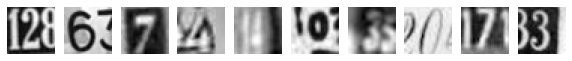

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [22]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

Need to reshape the X_train and test so that the same can be fed for model building.

In [23]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Training set', X_train.shape, y_train1.shape)
print('Test set', X_test.shape, y_test1.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


In [24]:
print(X_test.shape)
print(y_test1.shape)

(18000, 1024)
(18000,)


Encoding the target variables

In [0]:
# one hot encode outputs
y_train = to_categorical(y_train1)
y_test = to_categorical(y_test1)

# no.of classes
num_classes = y_test.shape[1]
num_hidden = 32

In [26]:
num_classes

10

In [0]:
x_tr = []
for i in range(42000):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(X_test[i,:].flatten())

In [0]:
x_tr =x_tr[:2000]
x_te =x_te[:2000]

In [0]:
y_tr = y_train1[0:2000]
y_te = y_test1[0:2000]

In [30]:
print(len(x_tr))
print(len(y_tr))
print(len(x_te))
print(len(y_tr))

2000
2000
2000
2000


#### Let us now build the neural network model, fit the training data, test it and provide model summary. Feel free to play around with the network and get to a better solution.

In [31]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers


def nn_model():
    # create model
    model = Sequential()  
    
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    sgd = optimizers.Adam(lr=1e-3)
    model.compile(loss=losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy']) ### Loss function = Categorical cross entropy
    return model

# build the model
model = nn_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Error: %.2f%%" % (100-scores[1]*100))

model.summary()

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 - 2s - loss: 2.2789 - accuracy: 0.1227 - val_loss: 2.1191 - val_accuracy: 0.2163
Epoch 2/30
42000/42000 - 2s - loss: 1.8525 - accuracy: 0.3234 - val_loss: 1.6987 - val_accuracy: 0.3780
Epoch 3/30
42000/42000 - 2s - loss: 1.6261 - accuracy: 0.4210 - val_loss: 1.5400 - val_accuracy: 0.4644
Epoch 4/30
42000/42000 - 2s - loss: 1.4320 - accuracy: 0.5202 - val_loss: 1.3143 - val_accuracy: 0.5774
Epoch 5/30
42000/42000 - 2s - loss: 1.2771 - accuracy: 0.5843 - val_loss: 1.2343 - val_accuracy: 0.6017
Epoch 6/30
42000/42000 - 2s - loss: 1.2001 - accuracy: 0.6154 - val_loss: 1.1825 - val_accuracy: 0.6238
Epoch 7/30
42000/42000 - 2s - loss: 1.1320 - accuracy: 0.6414 - val_loss: 1.1372 - val_accuracy: 0.6329
Epoch 8/30
42000/42000 - 2s - loss: 1.0778 - accuracy: 0.6596 - val_loss: 1.0785 - val_accuracy: 0.6549
Epoch 9/30
42000/42000 - 2s - loss: 1.0378 - accuracy: 0.6715 - val_loss: 1.0750 - val_accuracy: 0.6561
Epoch 10/30
42